In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import USA_Housing.csv
import akshay_complete_stats as ak


In [2]:
df=pd.read_csv("USA_Housing.csv")
df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
df.shape

(5000, 6)

In [6]:
for col_name in df.columns:
    print("\n",col_name)
    st_obj=ak.cal_stats(df[col_name])
    st_obj.everything()


 Avg. Area Income
Total Sum: 342915544.91985
Total Count: 5000
Minimum Value: 17796.63119
Maximum Value: 107701.7484
Range: 89905.11721
Average: 68583.10898397
Median: 68804.28640499999
no mode
Variance: 113570058.15998553
Standard Deviation: 10656.92536147202
Skewness: -0.03369974605287991
Kurtosis:print( 0.043110890763585985
Q1: 61480.56239
Q3: 75783.33866499999
IQR: 14302.77627499999
Lower Whisker: 40026.39797750002
Upper Whisker: 97237.50307749998
Outliers Count: 32

 Avg. Area House Age
Total Sum: 29886.110176435
Total Count: 5000
Minimum Value: 2.644304186
Maximum Value: 9.519088066
Range: 6.874783880000001
Average: 5.977222035287
Median: 5.970428947
no mode
Variance: 0.9827887594565952
Standard Deviation: 0.9913570292566625
Skewness: -0.007209544621788692
Kurtosis:print( -0.08571970912493532
Q1: 5.32228301575
Q3: 6.65080847925
IQR: 1.3285254635000001
Lower Whisker: 3.3294948205
Upper Whisker: 8.6435966745
Outliers Count: 25

 Avg. Area Number of Rooms
Total Sum: 34938.959254546

In [7]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [8]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)

In [12]:
error=(y_test-y_pred)

sse=sum(error**2)
print("sum of square errored",sse)

mse=sse/len(x_test)
print("Mean squared error",mse)

rmse=np.sqrt(mse)
print("Root mean square Error",rmse)

sum of square errored 10741594525106.41
Mean squared error 10741594525.106411
Root mean square Error 103641.66404060874
error 3279     13741.322082
1823    -56555.982521
287      -6914.031975
531     -24102.479033
3480     14258.622928
            ...      
346     -94899.612337
2303     63222.908284
934      11988.297399
4778    -92920.362412
560     163747.552276
Name: Price, Length: 1000, dtype: float64


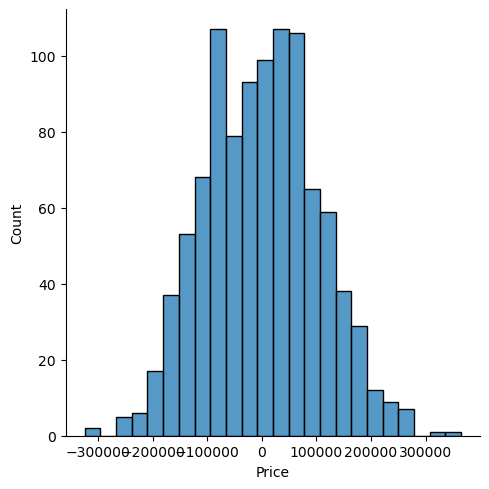

In [13]:
sns.displot(error)

In [14]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [15]:
import joblib

joblib.dump(lr,"house price pred.pkl")

['house price pred.pkl']